In [1]:
import pandas as pd

# Load full metadata
df_full = pd.read_csv("metadata.csv")

# Sample 30 cancer + 50 healthy
df_poc_cancer = df_full[df_full['label'] == 'cancer'].sample(n=30, random_state=42)
df_poc_healthy = df_full[df_full['label'] == 'healthy'].sample(n=50, random_state=42)

# Combine and shuffle
df_poc = pd.concat([df_poc_cancer, df_poc_healthy]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save
df_poc.to_csv("metadata_poc.csv", index=False)
print(f"[INFO] Created PoC dataset with {len(df_poc)} samples. Saved to metadata_poc.csv")
df_poc.head()


[INFO] Created PoC dataset with 80 samples. Saved to metadata_poc.csv


,filepath,label,source
0,F:\Research_Project_CMP9140\lung-cancer-cough-...,healthy,Coswara
1,F:\Research_Project_CMP9140\lung-cancer-cough-...,cancer,Kaggle Cancer
2,F:\Research_Project_CMP9140\lung-cancer-cough-...,cancer,Kaggle Cancer
3,F:\Research_Project_CMP9140\lung-cancer-cough-...,healthy,Coswara
4,F:\Research_Project_CMP9140\lung-cancer-cough-...,cancer,Kaggle Cancer


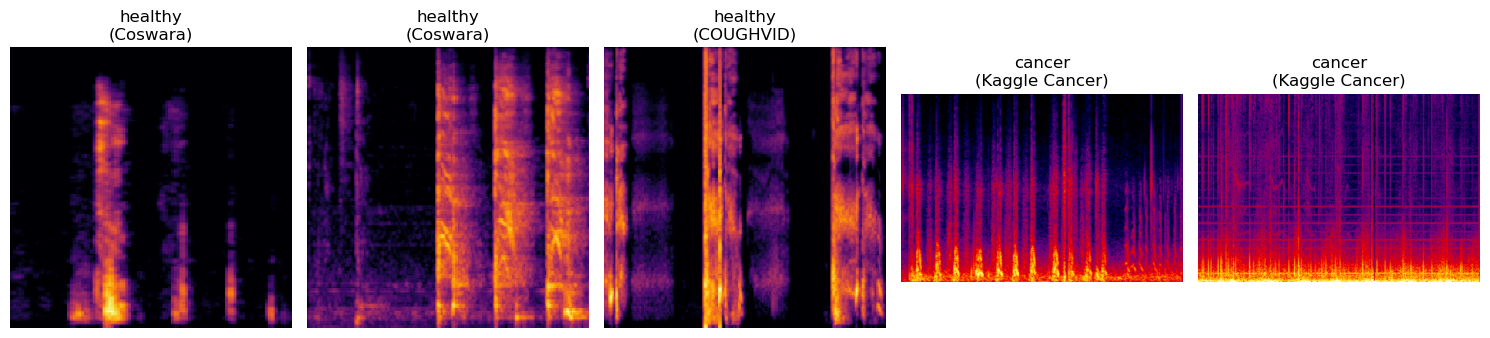

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image

# Load PoC metadata
df_poc = pd.read_csv("metadata_poc.csv")

# Pick 5 random samples to visualize
samples = df_poc.sample(n=5, random_state=1)

plt.figure(figsize=(15, 5))

for idx, (fp, label, source) in enumerate(samples.values):
    img = Image.open(fp).convert("RGB")
    
    plt.subplot(1, 5, idx+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{label}\n({source})")

plt.tight_layout()
plt.show()
